In [4]:
import numpy as np
import pandas as pd

In [5]:
df = pd.read_csv('../input/advertising/Advertising.csv', index_col = 0)

In [6]:
df.head()

,TV,radio,newspaper,sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
TV,200.0,147.0425,85.854236,0.7,74.375,149.75,218.825,296.4
radio,200.0,23.2640,14.846809,0.0,9.975,22.90,36.525,49.6
newspaper,200.0,30.5540,21.778621,0.3,12.750,25.75,45.100,114.0
sales,200.0,14.0225,5.217457,1.6,10.375,12.90,17.400,27.0


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 200 entries, 1 to 200
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   radio      200 non-null    float64
 2   newspaper  200 non-null    float64
 3   sales      200 non-null    float64
dtypes: float64(4)
memory usage: 7.8 KB


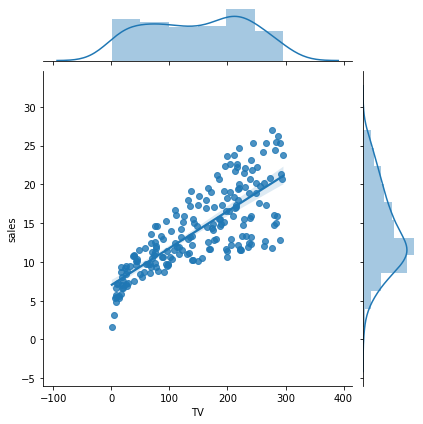

In [9]:
import seaborn as sns
sns.jointplot(x = 'TV',y = 'sales', data = df, kind ='reg');

In [10]:
df.head()

,TV,radio,newspaper,sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


In [11]:
from sklearn.linear_model import LinearRegression

In [12]:
X = df[['TV']]
X.head()

,TV
1,230.1
2,44.5
3,17.2
4,151.5
5,180.8


In [13]:
y = df[['sales']]
y.head()

,sales
1,22.1
2,10.4
3,9.3
4,18.5
5,12.9


# MODEL**

In [14]:
reg_model = LinearRegression()
reg_model.fit(X,y)

LinearRegression()

In [15]:
reg_model

LinearRegression()

In [16]:
reg_model.intercept_

array([7.03259355])

In [17]:
reg_model.coef_

array([[0.04753664]])

In [18]:
reg_model.score(X,y)

0.611875050850071

# *GUESS*

**How much money we would earn, if we were to spend 40 units on TV?**

y_hat = 7.03 + 0.04*xi

In [19]:
7.03 + 0.04*40

8.63

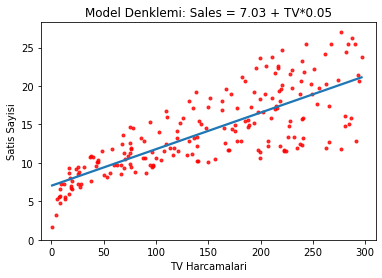

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt
g = sns.regplot(df['TV'], df['sales'],ci = None, scatter_kws={'color':'r','s':9})
g.set_title('Model Denklemi: Sales = 7.03 + TV*0.05')
g.set_ylabel('Satis Sayisi')
g.set_xlabel('TV Harcamalari')
plt.xlim(-10,310)
plt.ylim(bottom=0);

In [21]:
reg_model.intercept_ + reg_model.coef_*165

array([[14.87613922]])

In [22]:
reg_model.predict([[165]])

array([[14.87613922]])

In [23]:
new_data = [[5],[15],[30]]
reg_model.predict(new_data)

array([[7.27027675],
       [7.74564316],
       [8.45869276]])

# > MULTIPLE LINEAR REGRESSION

In [24]:
X = df.drop('sales', axis=1)
y = df[['sales']]

# **MODEL**

In [25]:
reg_model = LinearRegression()

In [26]:
reg_model.fit(X,y)

LinearRegression()

In [27]:
reg_model.intercept_

array([2.93888937])

In [28]:
reg_model.coef_

array([[ 0.04576465,  0.18853002, -0.00103749]])

# **GUESS**

# Sales = 2.94 + TV 0.04 + radio 0.19 - newspaper*0.001

# 30 unit TV, 10 unit radio, 40 unit newspaper

In [29]:
2.94 + 30*0.04 + 10*0.19 - 40*0.001

5.999999999999999

In [30]:
new_dat = [[300],[120],[400]]
new_dat = pd.DataFrame(new_dat).T

In [31]:
reg_model.predict(new_dat)

array([[38.87688782]])

In [32]:
from sklearn.metrics import mean_squared_error
y.head()

,sales
1,22.1
2,10.4
3,9.3
4,18.5
5,12.9


# > EVALUATING OF THE SUCCESS OF GUESS MENTIONED

In [33]:
reg_model

LinearRegression()

In [34]:
reg_model.predict(X)

array([[20.52397441],
       [12.33785482],
       [12.30767078],
       [17.59782951],
       [13.18867186],
       [12.47834763],
       [11.72975995],
       [12.12295317],
       [ 3.72734086],
       [12.55084872],
       [ 7.0322992 ],
       [17.28512918],
       [10.57712073],
       [ 8.82630048],
       [18.43436638],
       [20.81929952],
       [12.82365674],
       [23.22495716],
       [ 9.95168206],
       [14.16607293],
       [18.10076728],
       [14.7405382 ],
       [ 6.4891503 ],
       [16.5459329 ],
       [ 8.14651887],
       [15.6100386 ],
       [14.98951429],
       [17.05167344],
       [19.41053803],
       [ 9.14402389],
       [21.6339338 ],
       [11.3460929 ],
       [ 7.63888314],
       [18.86426829],
       [ 7.57483051],
       [17.00682618],
       [23.40590052],
       [15.62347779],
       [ 9.90868103],
       [20.44761039],
       [16.37766467],
       [17.2959832 ],
       [21.59580326],
       [13.96385684],
       [ 8.88787996],
       [15

In [35]:
y_pred = reg_model.predict(X)

In [36]:
mse = mean_squared_error(y, y_pred)
mse

2.784126314510936

In [37]:
import numpy as np
rmse = np.sqrt(mse)
rmse

1.6685701407225697

In [38]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
TV,200.0,147.0425,85.854236,0.7,74.375,149.75,218.825,296.4
radio,200.0,23.2640,14.846809,0.0,9.975,22.90,36.525,49.6
newspaper,200.0,30.5540,21.778621,0.3,12.750,25.75,45.100,114.0
sales,200.0,14.0225,5.217457,1.6,10.375,12.90,17.400,27.0


# > MODEL VALIDATION...HOLD OUT METHOD

In [39]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.20, random_state=1)


In [40]:
X_train.head()

,TV,radio,newspaper
109,13.1,0.4,25.6
108,90.4,0.3,23.2
190,18.7,12.1,23.4
15,204.1,32.9,46.0
57,7.3,28.1,41.4


In [41]:
y_train.head()

,sales
109,5.3
108,8.7
190,6.7
15,19.0
57,5.5


In [42]:
X_test.head()

,TV,radio,newspaper
59,210.8,49.6,37.7
41,202.5,22.3,31.6
35,95.7,1.4,7.4
103,280.2,10.1,21.4
185,253.8,21.3,30.0


In [43]:
y_test.head()

,sales
59,23.8
41,16.6
35,9.5
103,14.8
185,17.6


In [44]:
X_train.shape

(160, 3)

In [45]:
X_test.shape

(40, 3)

In [46]:
reg_model = LinearRegression()
reg_model.fit(X_train, y_train)

LinearRegression()

In [47]:
y_pred = reg_model.predict(X_train)

# *TRAIN ERROR*

In [48]:
np.sqrt(mean_squared_error(y_train, y_pred))

1.736902590147092

In [49]:
y_pred = reg_model.predict(X_test)

# *TEST ERROR*

In [50]:
np.sqrt(mean_squared_error(y_test, y_pred))

1.4113417558581585

# **K FOLD CROSS VALIDATION**

In [51]:
from sklearn.model_selection import cross_val_score

In [52]:
reg_model = LinearRegression()

In [54]:
#FIRST METHOD:
-cross_val_score(reg_model,X,y,cv=10, scoring = 'neg_mean_squared_error')

array([3.56038438, 3.29767522, 2.08943356, 2.82474283, 1.3027754 ,
       1.74163618, 8.17338214, 2.11409746, 3.04273109, 2.45281793])

In [55]:
np.mean(-cross_val_score(reg_model,X,y,cv=10, scoring = 'neg_mean_squared_error'))

3.0599676181185145

In [56]:
np.std(-cross_val_score(reg_model, X,y,cv=10,scoring = 'neg_mean_squared_error'))

1.831407040170274

In [57]:
np.sqrt(np.mean(-cross_val_score(reg_model,X,y,cv=10, scoring = 'neg_mean_squared_error')))

1.7492763126843383

# > SECOND METHOD

In [58]:
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size = 0.20, random_state = 1)

In [61]:
reg_model = LinearRegression()
reg_model.fit(X_train,y_train)

LinearRegression()

In [60]:
np.sqrt(np.mean(-cross_val_score(reg_model, X_train, y_train, cv=10, scoring = 'neg_mean_squared_error')))

1.7854163438661463

In [62]:
#Test
y_pred = reg_model.predict(X_test)

In [63]:
#Test_Error
np.sqrt(mean_squared_error(y_test,y_pred))

1.4113417558581585